In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis,zscore,boxcox
df = pd.read_csv("/Users/meenu/files/house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Summary Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


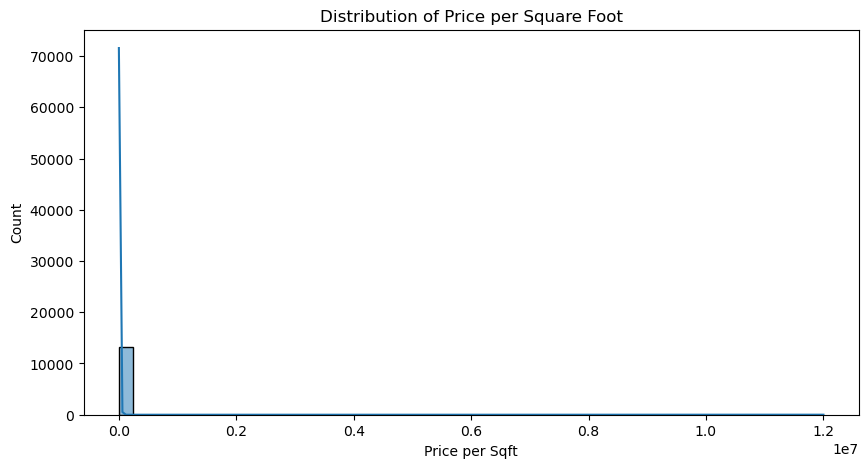

In [7]:
#Question 1
print("Missing Values:\n",df.isnull().sum())
print("\nSummary Statistics:\n",df.describe())
plt.figure(figsize=(10,5))
sns.histplot(df['price_per_sqft'],bins=50,kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()

In [37]:
#Question 2
original_pps=df['price_per_sqft']
#a)Mean and Std Dev Method
mean_pps=original_pps.mean()
std_pps=original_pps.std()
df_mean_std=df[(original_pps>=(mean_pps-3)*std_pps) & (original_pps<=(mean_pps+3)*std_pps)]
#b)Percentile Method
low,high=np.percentile(original_pps,[5,95])
df_percentile=df[(original_pps>=low) & (original_pps<=high)]
#c)IQR Method
Q1=original_pps.quantile(0.25)
Q3=original_pps.quantile(0.75)
IQR=Q3-Q1
df_iqr=df[(original_pps>=(Q1-1.5)*IQR) & (original_pps<=(Q3+1.5)*IQR)]
#d)Z-score Method
z_scores=zscore(original_pps)
df_zscore=df[np.abs(z_scores)<3]

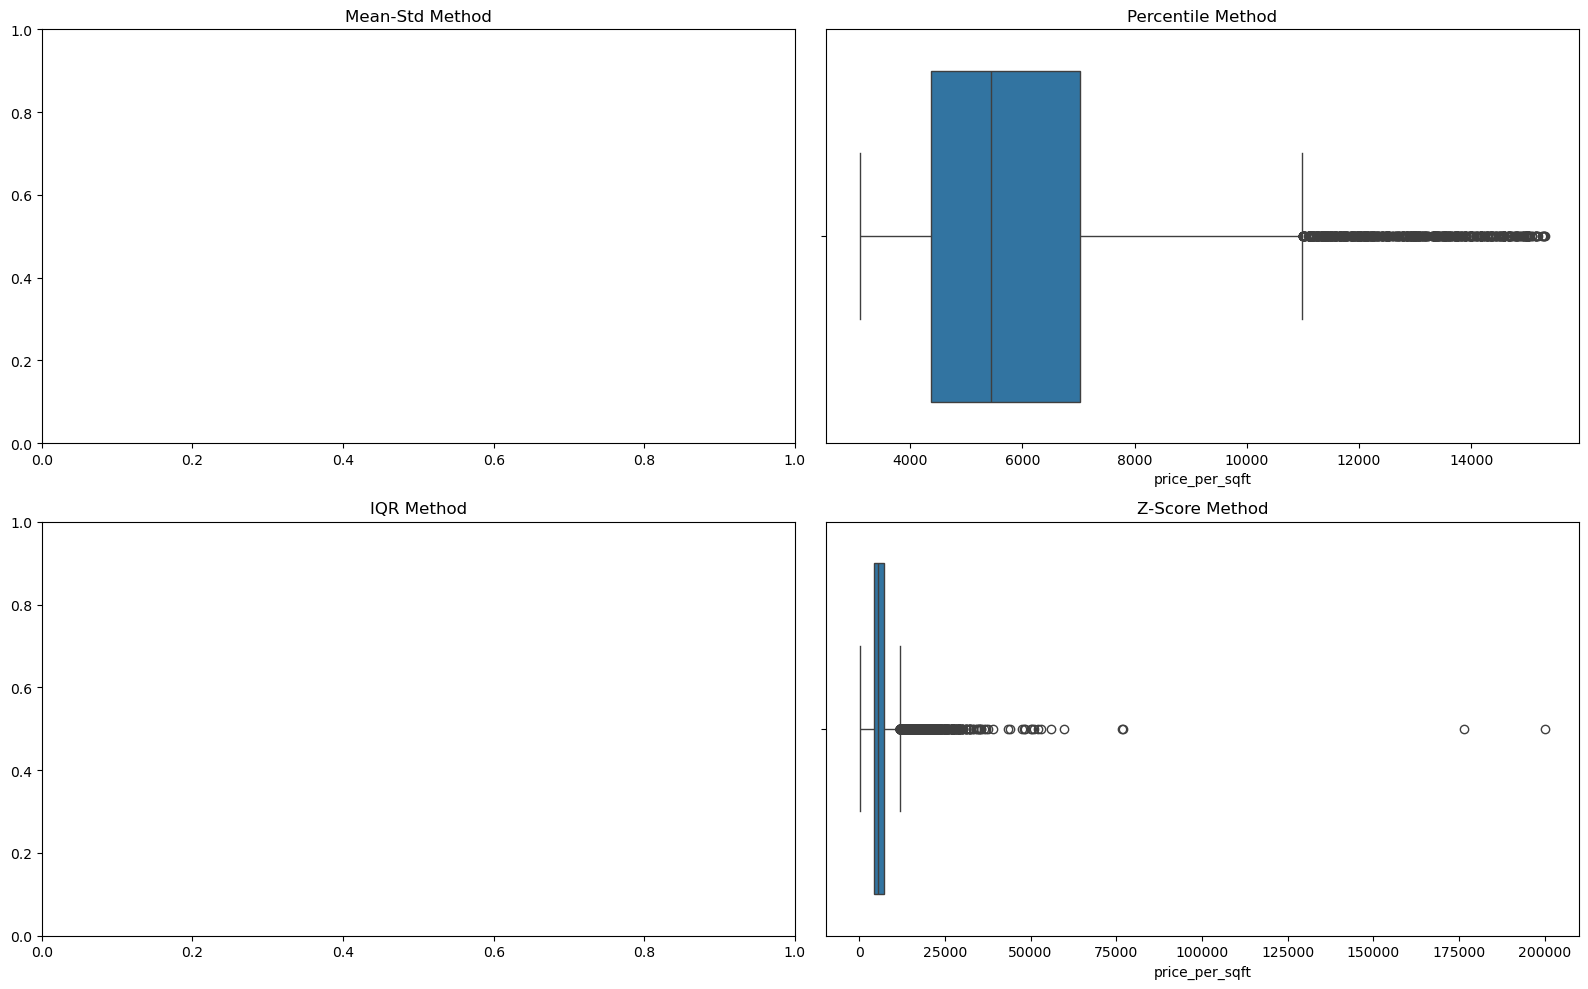

In [25]:
#Question 3
plt.figure(figsize=(16,10))
methods=[df_mean_std,df_percentile,df_iqr,df_zscore]
titles=['Mean-Std Method','Percentile Method','IQR Method','Z-Score Method']
for i,(data, title) in enumerate(zip(methods,titles),1):
    plt.subplot(2,2,i)
    sns.boxplot(x=data['price_per_sqft'])
    plt.title(title)
plt.tight_layout()
plt.show()

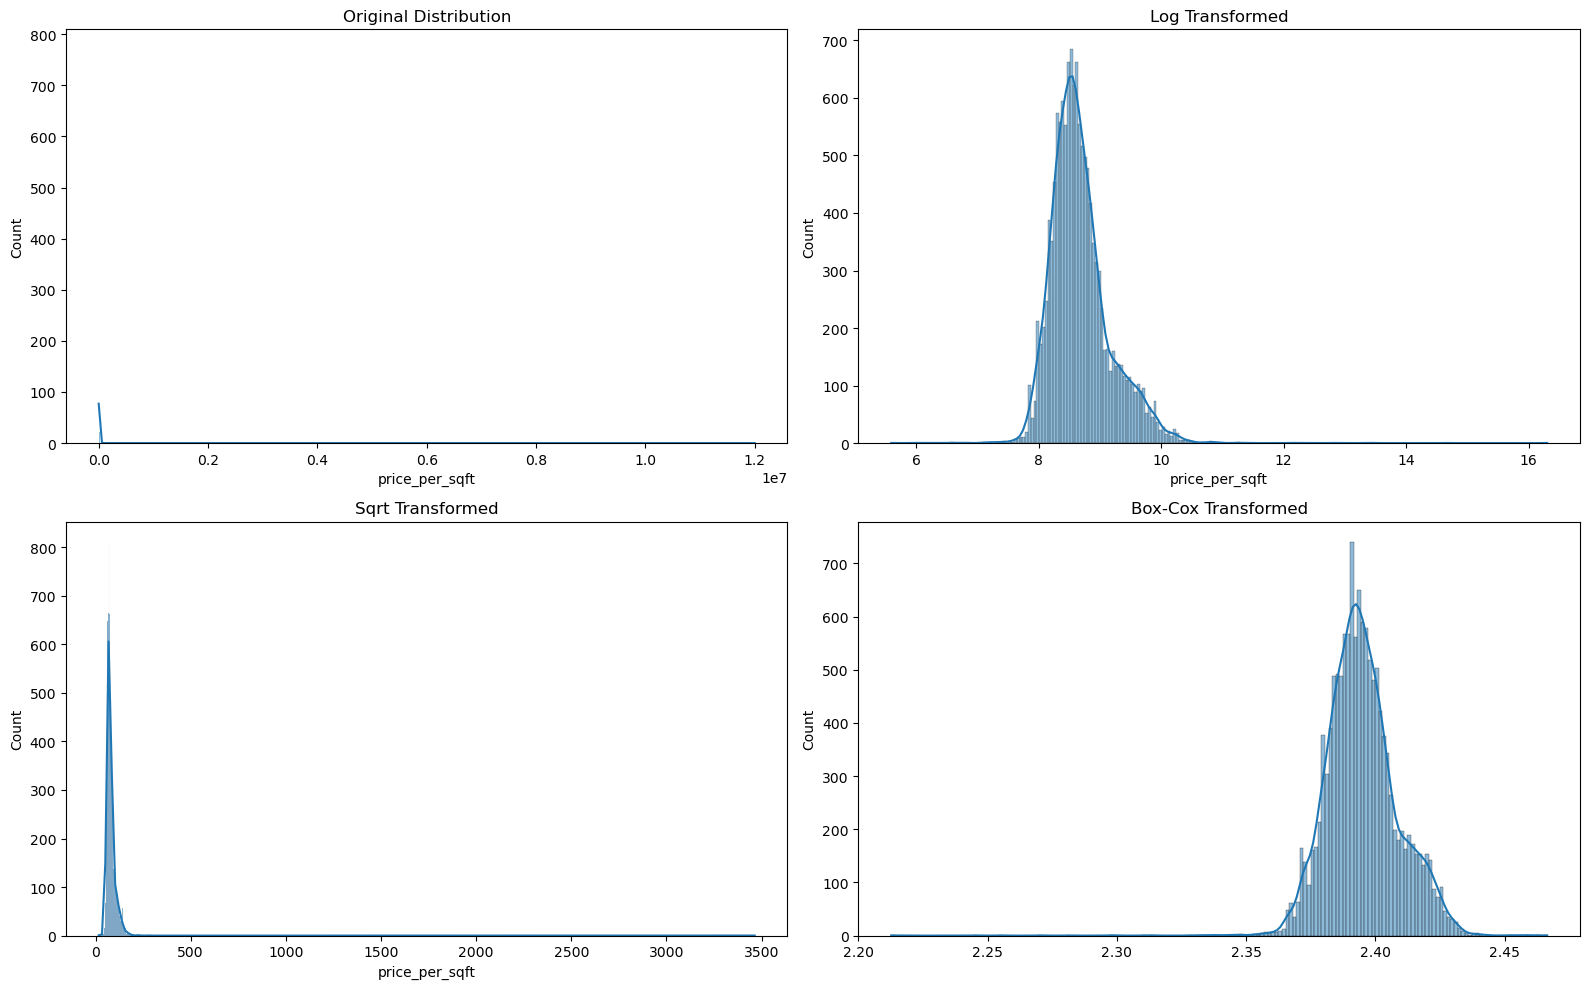


Skewness and Kurtosis:
   Transformation    Skewness      Kurtosis
0       Original  108.268750  12090.633539
1            Log    1.400326      9.203001
2           Sqrt   50.920241   4032.774413
3        Box-Cox   -0.211685      5.874067


In [29]:
#Question 4
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.histplot(original_pps,kde=True,ax=axes[0,0])
axes[0,0].set_title("Original Distribution")
original_skew=skew(original_pps)
original_kurt=kurtosis(original_pps)
log_pps=np.log1p(original_pps)
sns.histplot(log_pps,kde=True,ax=axes[0,1])
axes[0,1].set_title("Log Transformed")
log_skew=skew(log_pps)
log_kurt=kurtosis(log_pps)
sqrt_pps=np.sqrt(original_pps)
sns.histplot(sqrt_pps,kde=True,ax=axes[1,0])
axes[1,0].set_title("Sqrt Transformed")
sqrt_skew=skew(sqrt_pps)
sqrt_kurt=kurtosis(sqrt_pps)
boxcox_pps,_=boxcox(original_pps)
sns.histplot(boxcox_pps,kde=True,ax=axes[1,1])
axes[1,1].set_title("Box-Cox Transformed")
boxcox_skew=skew(boxcox_pps)
boxcox_kurt=kurtosis(boxcox_pps)
plt.tight_layout()
plt.show()
trans_stats=pd.DataFrame({
    'Transformation':['Original','Log','Sqrt','Box-Cox'],
    'Skewness':[original_skew,log_skew,sqrt_skew,boxcox_skew],
    'Kurtosis':[original_kurt,log_kurt,sqrt_kurt,boxcox_kurt]
})
print("\nSkewness and Kurtosis:\n",trans_stats)

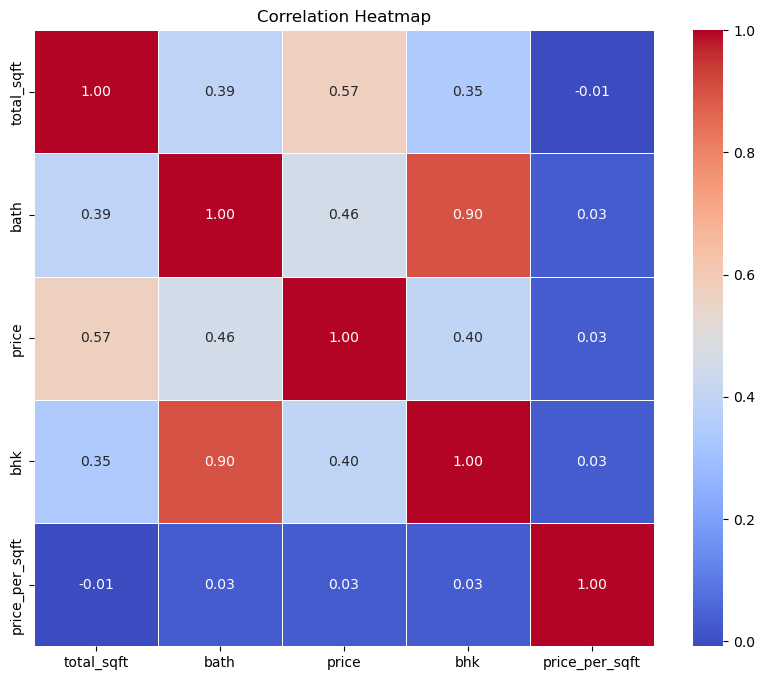

In [31]:
#Question 5
numeric_cols=df.select_dtypes(include=[np.number])
corr=numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

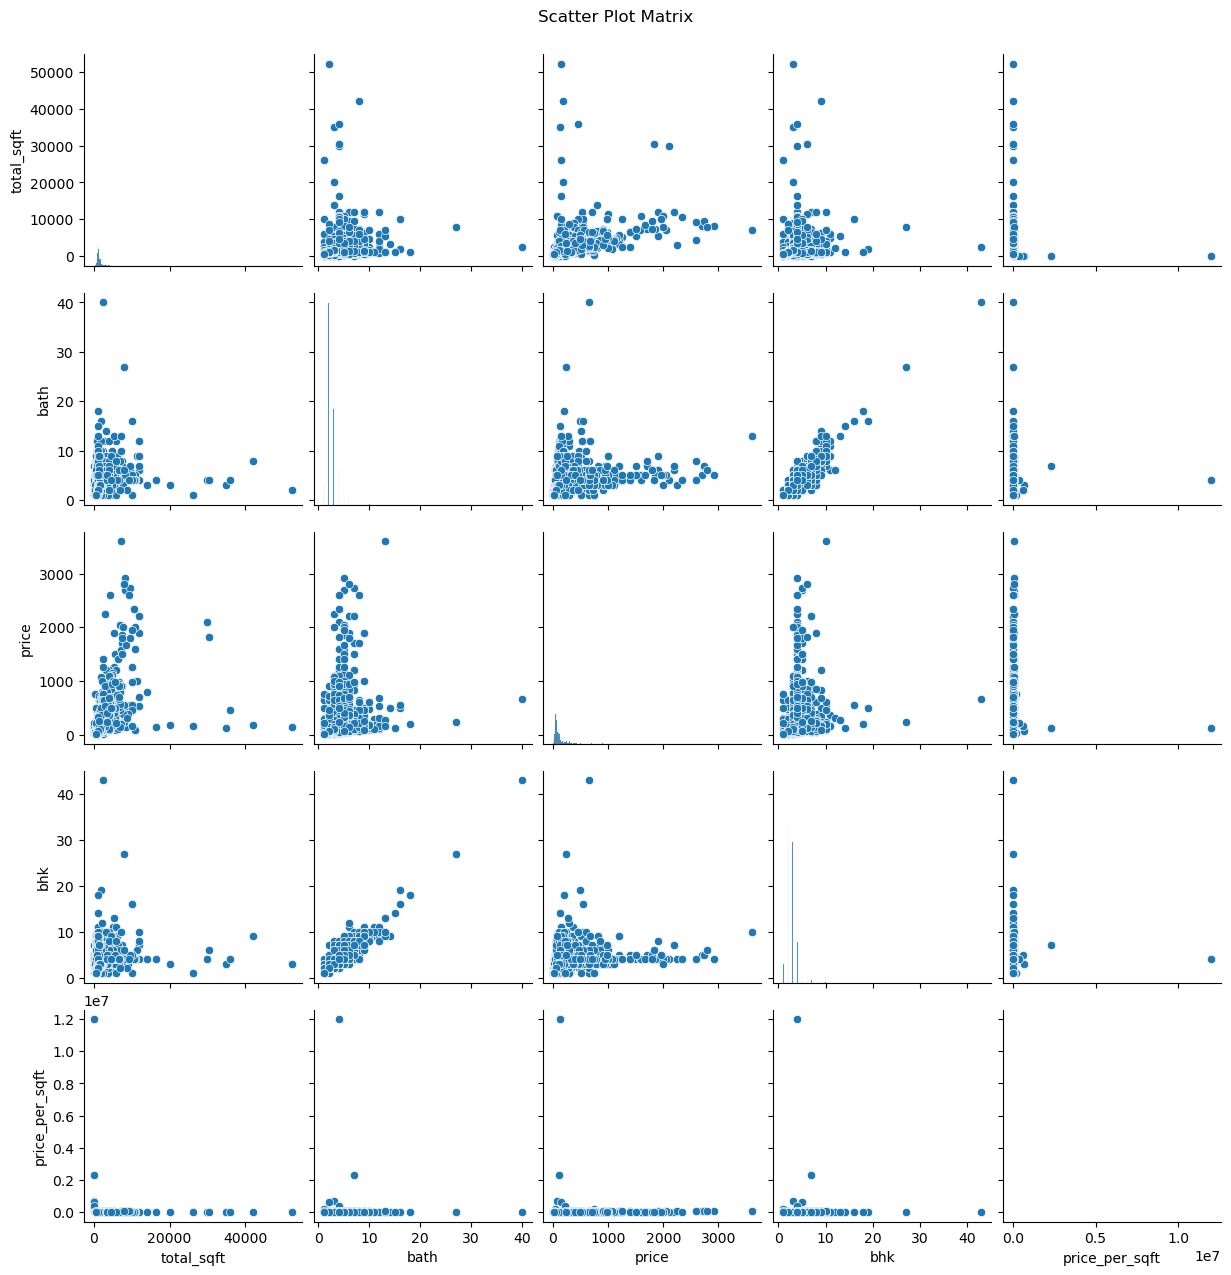

In [35]:
#Question 6:
columns_to_plot=df[['total_sqft','bath','price','bhk','price_per_sqft']]
sns.pairplot(columns_to_plot)
plt.suptitle("Scatter Plot Matrix",y=1.02)
plt.show()